In [12]:
import os
from xml.dom import minidom
import lxml.etree as xmltree
from pynest.elements.piece import Piece
from pynest.elements.viewbox import ViewBox
from pynest.utils import create_rectangle

In [3]:
data_path = f"{os.getcwd()}/pynest/data/svgs"
data_path

'/workspaces/paper-model-nest/pynest/data/svgs'

In [4]:
# root = svg.getroot()
# viewbox = ViewBox(root.get('viewBox'))
# width = float(root.get('width').replace("mm", ""))


In [5]:
# cut = svg.find(f'.//{svg_ns}g[@id="cut"]')
# groups = cut.findall(f'./{svg_ns}g')

In [15]:
import typing as tp

class PaperModel:

    def __init__(self, svg_path:str):
        self.svg_path = svg_path
        self.width = None
        self.height = None
        self.viewbox:ViewBox = None
        self.pieces: tp.List[Piece] = None

        self._read_svg()

    def _set_viewbox(self, root):
        vb = root.get('viewBox')
        self.viewbox = ViewBox(vb)
    
    def _set_dimensions(self, root):
        self.width = float(root.get('width').replace("mm", ""))
        self.height = float(root.get('height').replace("mm", ""))

    def _create_piece_from_paths(self, paths, name=None):
        piece = Piece(name=name)
        for path in paths:
            d = path.get('d')
            piece.add_segments_from_path(d, self.width, self.viewbox)

        return piece
    
    def _create_pieces_from_groups(self, groups, pieces, name=None):
        for group in groups:
            group_groups = group.findall(f'./{self.svg_ns}g')
            name = group.get('id') if not name else name + "-" + group.get('id')

            # Nested groups
            if len(group_groups) > 0:
                self._create_pieces_from_groups(group_groups, pieces, name)
            # Groups containing only paths
            else:
                paths = group.findall(f'./{self.svg_ns}path')
                pieces.append(self._create_piece_from_paths(paths, name))

    def _read_svg(self):
        svg = xmltree.parse(self.svg_path)

        # Name space 
        nsmap = svg.getroot().nsmap
        self.svg_ns = '{' + nsmap['svg'] + '}'

        # Parse svg, reading paths into pieces
        root = svg.getroot()
        self._set_viewbox(root)
        self._set_dimensions(root)

        # Group of pieces' groups is called "cut"
        cut = svg.find(f'.//{self.svg_ns}g[@id="cut"]')
        groups = cut.findall(f'./{self.svg_ns}g')
    	
        # Create pieces
        pieces = []
        self._create_pieces_from_groups(groups, pieces)

        self.pieces = pieces


In [16]:
model = PaperModel(f'{data_path}/harry-potter.svg')

In [39]:
pieces = []

def create_piece(paths, name=None):
    piece = Piece(name=name)
    for path in paths:
        d = path.get('d')
        piece.add_segments_from_path(d, width, viewbox)

    return piece

def create_pieces_from_groups(groups, pieces, gid=None):
    for group in groups:
        group_groups = group.findall(f'./{svg_ns}g')
        name = group.get('id') if not gid else gid + "-" + group.get('id')

        if len(group_groups) > 0:
            create_pieces_from_groups(group_groups, pieces, name)
        else:
            paths = group.findall(f'./{svg_ns}path')
            pieces.append(create_piece(paths, name))

create_pieces_from_groups(groups, pieces)

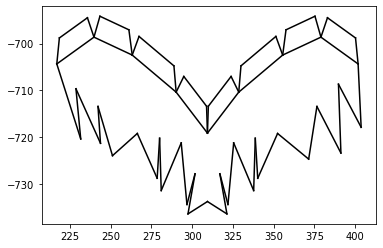

In [40]:
pieces[37].plot()

In [9]:
import numpy as np

In [10]:
groups = svg.findall('.//{http://www.w3.org/2000/svg}g[@id="cut"]')

In [11]:
groups[0].get("id")

'cut'

In [12]:
nsmap

{'dc': 'http://purl.org/dc/elements/1.1/',
 'cc': 'http://creativecommons.org/ns#',
 'rdf': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#',
 'svg': 'http://www.w3.org/2000/svg',
 None: 'http://www.w3.org/2000/svg',
 'xlink': 'http://www.w3.org/1999/xlink',
 'sodipodi': 'http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd',
 'inkscape': 'http://www.inkscape.org/namespaces/inkscape'}